<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [1]:
import pandas as pd

%matplotlib inline

In [3]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


In [17]:
df1 = df[['Pu239','Pu240']]
df1.head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

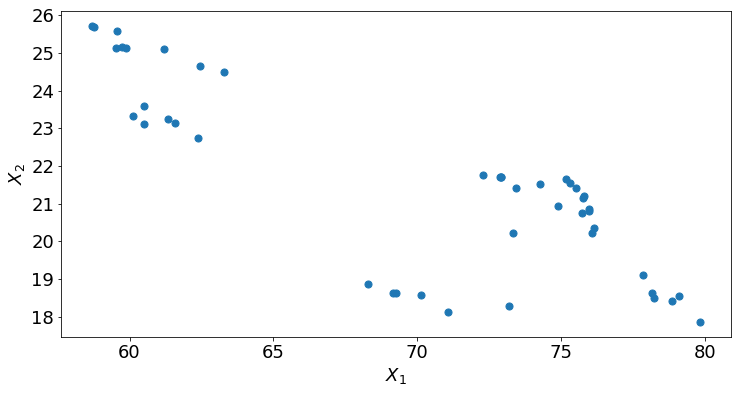

In [20]:
ax = df1.plot(kind="scatter", x="Pu239", y="Pu240", figsize=(12,6), s=50)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

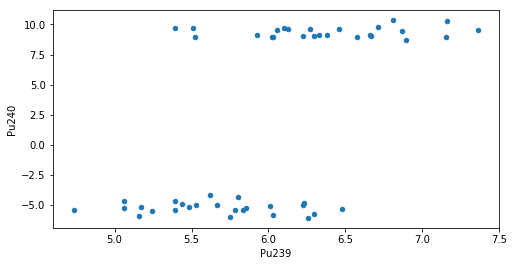

In [25]:
# A:
X, color = make_blobs(n_samples=50, random_state=13, centers=2, cluster_std=.5, )
X = map(lambda x: (x[0][0], x[0][1], color[x[1]]), zip(X, color))

points = pd.DataFrame(list(X), columns=["Pu239", "Pu240", "color"])
ax = points.plot(kind="scatter", x="Pu239", y="Pu240", figsize=(8, 4))

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [23]:
X = df.loc[:, ['Pu239', 'Pu240']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [24]:
km.cluster_centers_

array([[-1.31858916,  1.19688286],
       [ 0.63767668, -1.2653207 ],
       [ 0.67370652, -0.15385525]])

In [26]:
km.labels_

array([2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       0])

In [27]:
km.predict(X_sc)

array([2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       0])

### Assign clusters assignments (predictions) back to the original dataframe

In [29]:
# A: 
df1['cluster'] = km.labels_
df1.head()

C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pu239,Pu240,cluster
0,75.804,21.204,2
1,75.515,21.408,2
2,75.175,21.668,2
3,78.872,18.428,1
4,73.317,20.223,2


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [30]:
# A:
km.cluster_centers_

array([[-1.31858916,  1.19688286],
       [ 0.63767668, -1.2653207 ],
       [ 0.67370652, -0.15385525]])

In [32]:
df1.groupby('cluster').mean()

,Pu239,Pu240
cluster,,
0,60.633933,24.387533
1,74.432583,18.516250
2,74.686722,21.166611


In [33]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["Pu239", "Pu240"]
)
centroids

,Pu239,Pu240
0,60.633933,24.387533
1,74.432583,18.516250
2,74.686722,21.166611


C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<Figure size 504x504 with 0 Axes>

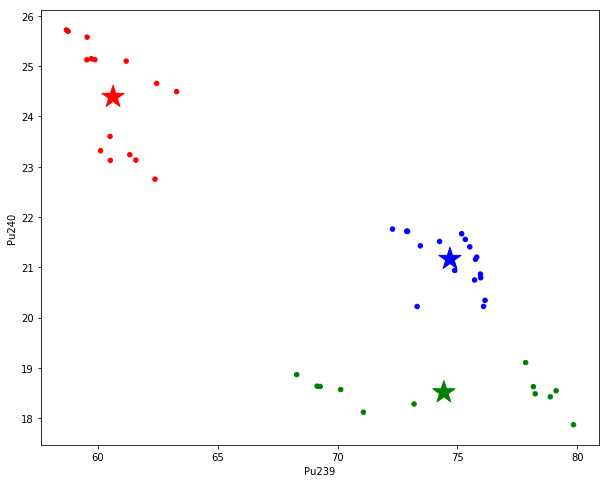

In [34]:
plt.figure(figsize=(7,7))

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df1['color'] = df1['cluster'].map(lambda p: colors[p])

ax = df1.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df1['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [ ]:
# A:

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [35]:
# A: from sklearn.metrics import silhouette_score
silhouette_score(X_sc, km.labels_)

0.6332174776862322